In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score  
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score



In [ ]:
polish_train_val = pd.read_csv('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/polish/data/5year-Tr.csv')
polish_test=pd.read_csv('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/polish/data/5year-Ts.csv')
y_train_val=polish_train_val['LABEL']
y_test=polish_test['LABEL']
x_test=polish_test.drop(['LABEL','Company'],axis=1)
polish_train_val=polish_train_val.drop(['LABEL','Company'],axis=1)
x_test=x_test.replace(' ', np.nan).astype(float)
polish_train_val=polish_train_val.replace(' ', np.nan).astype(float)

# convert all columns to float

x_test

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
0,0.045646,0.200560,0.799440,4.98600,214.1200,NaN,0.045646,3.986000,1.88110,0.799440,...,206.070,0.332450,0.057098,0.67639,NaN,7.1165,16.09500,38.916,9.37920,NaN
1,0.001938,0.034184,0.211820,7.19640,149.6900,-0.009531,0.002422,28.096000,1.01570,0.960410,...,7535.700,0.015467,0.002017,0.98453,NaN,3.2347,3.22860,39.928,9.14150,0.41444
2,-0.199000,0.986250,-0.690690,0.29968,-625.8700,NaN,-0.199000,0.013942,0.24518,0.013751,...,-179.170,-0.646950,-14.472000,1.81170,NaN,NaN,0.83486,1468.300,0.24859,0.34804
3,0.098103,0.350200,0.292080,2.38030,42.6230,NaN,0.098103,1.855500,1.28600,0.649800,...,81955.000,0.233090,0.150970,0.76845,0.15858,7.2982,4.12370,60.061,6.07720,2.59100
4,0.094502,0.643700,0.057040,1.12860,9.2163,NaN,0.117850,0.553510,1.93090,0.356300,...,169.620,0.076694,0.265230,0.93901,0.55501,NaN,5.33860,83.832,4.35390,3.86590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,-0.242470,0.865520,-0.130520,0.82523,-156.6400,NaN,-0.242470,0.155370,2.31260,0.134480,...,-1286.400,0.021507,-1.803100,1.10280,0.88273,24.0980,5.37400,117.870,3.09660,6.02700
1178,-0.045268,0.974370,0.354210,2.63500,85.4380,0.003439,-0.060856,-0.007206,1.05790,-0.007022,...,30927.000,0.054755,6.447000,0.94524,-107.92000,11.1900,2.55850,75.266,4.84950,2.44820
1179,0.129710,0.640710,-0.003776,0.99411,-33.7050,NaN,0.160840,0.560760,2.37630,0.359290,...,-24.509,0.074935,0.361020,0.93242,NaN,11.9380,6.88190,98.415,3.70880,6.54500
1180,0.360300,0.379680,0.611190,2.75020,64.4190,NaN,0.282600,1.633800,2.38200,0.620320,...,1876.200,0.065275,0.580820,0.88795,NaN,12.1380,3.42590,53.511,6.82100,60.17400


In [ ]:
for col in x_test.columns:
    avg = x_test[col].mean()
    x_test[col].fillna(avg, inplace=True)

In [ ]:
for col in polish_train_val.columns:
    avg = polish_train_val[col].mean()
    polish_train_val[col].fillna(avg, inplace=True)

In [ ]:
import seaborn as sns
import plotly.express as px

In [ ]:
print('pos: ', sum(y_test)/len(y_test))
print('neg: ', 1-sum(y_test)/len(y_test))
neg=1-sum(y_test)/len(y_test)
pos=sum(y_test)/len(y_test)
print(neg/pos)

pos:  0.07360406091370558
neg:  0.9263959390862944
12.586206896551724


In [ ]:
print('y_train_val pos: ', sum(y_train_val)/len(y_train_val))
print('y_train_val neg: ', 1-sum(y_train_val)/len(y_train_val))
neg=1-sum(y_train_val)/len(y_train_val)
pos=sum(y_train_val)/len(y_train_val)
print('y_train_val neg/pos: ',neg/pos)

y_train_val pos:  0.06831641285956007
y_train_val neg:  0.93168358714044
y_train_val neg/pos:  13.637770897832818


<Axes: xlabel='LABEL', ylabel='count'>

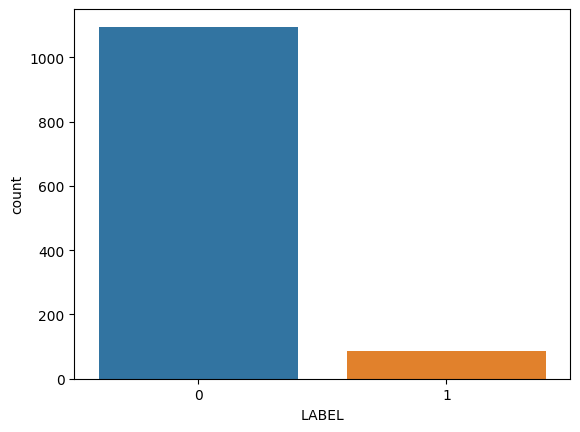

In [ ]:
sns.countplot(x=y_test)

<Axes: xlabel='LABEL', ylabel='count'>

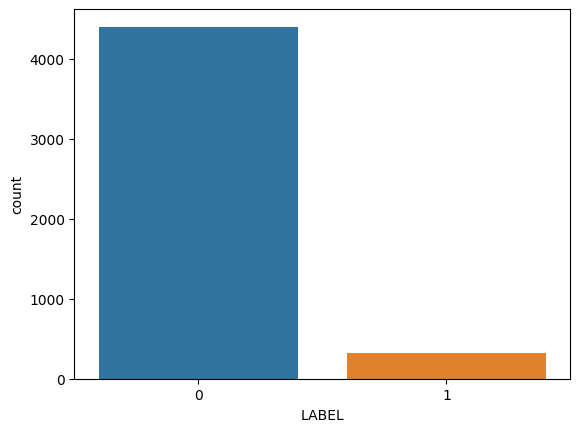

In [ ]:
sns.countplot(x=y_train_val)

In [ ]:
import random
from sklearn.model_selection import train_test_split
train_val_data=polish_train_val 
train_val_label=y_train_val.values.tolist()

train_data, val_data, train_y, val_y =  train_test_split(train_val_data,train_val_label,test_size=0.15, stratify=train_val_label, random_state=0)

print(len(train_val_label))
print(len(train_data))
print(len(val_data))


4728
4018
710


In [ ]:
train_data.to_csv('train_data.csv',index=0)
val_data.to_csv('val_data.csv',index=0)
pd.DataFrame(train_y).to_csv('train_y.csv',index=0)
pd.DataFrame(val_y).to_csv('val_y.csv',index=0)


In [ ]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
x_train= x_scaler.fit_transform(train_data)
x_test= x_scaler.fit_transform(x_test)
x_val=x_scaler.fit_transform(val_data)
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(4018, 64)
(1182, 64)
(710, 64)


In [ ]:
model_1 = LogisticRegression(max_iter=8000).fit(x_train, train_y)

y_predict2=model_1.predict_proba(x_val)[:, 1]

#find the optimal threshold
precision2, recall2, thresholds2 = precision_recall_curve(val_y, y_predict2)

df_recall_precision2 = pd.DataFrame({'Precision':precision2[:-1],
                                    'Recall':recall2[:-1],
                                    'Threshold':thresholds2})
df_recall_precision2



,Precision,Recall,Threshold
0,0.069014,1.0,4.360880e-14
1,0.069111,1.0,2.487923e-12
2,0.069209,1.0,9.584300e-12
3,0.069307,1.0,2.789660e-11
4,0.069405,1.0,5.858648e-11
...,...,...,...
704,0.000000,0.0,9.650762e-01
705,0.000000,0.0,9.775188e-01
706,0.000000,0.0,9.922643e-01
707,0.000000,0.0,1.000000e+00


In [ ]:
np.seterr(divide='ignore', invalid='ignore')
f1_score = (2 * precision2 * recall2) / (precision2 + recall2)
findex=list(f1_score).index(max(f1_score))
thresholdOpt = round(thresholds2[findex], ndigits = 4)
fscoreOpt = round(f1_score[findex], ndigits = 4)
recallOpt = round(recall2[findex], ndigits = 4)
precisionOpt = round(precision2[findex], ndigits = 4)
print('Best Threshold: {} , F-Score: {}'.format(thresholdOpt, fscoreOpt))
print('Recall: {}, Precision: {}'.format(recallOpt, precisionOpt))

from sklearn.metrics import precision_score, classification_report, recall_score, f1_score, roc_auc_score, confusion_matrix, accuracy_score
y_pre_test2=model_1.predict_proba(x_test)[:, 1]
defaulter_decision_2 = (y_pre_test2 >= thresholdOpt)
print(classification_report(y_test, defaulter_decision_2))



Best Threshold: 0.0991 , F-Score: 0.2182
Recall: 0.3673, Precision: 0.1552
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1095
           1       0.21      0.34      0.26        87

    accuracy                           0.85      1182
   macro avg       0.58      0.62      0.59      1182
weighted avg       0.89      0.85      0.87      1182

